In this project, I will use the TextBlob library to run a sentiment analysis on movie review data.

To begin, I'm going to create a Pandas DataFrame using a data set known as the "Polarity Data Set". It is a set of 1,000 positive and 1,000 negative movie reviews. The data is broken down into files in two seperate folders. Each positive review is a .txt file in a 'pos' folder, and each negative review is a file in the 'neg' folder. Both folders are located in a folde named 'txt_sentoken'.

Once the data is structured, I will clean it up and format it so that the algorithm can read it, play with it a little to look for any features that stand out, and then test the TextBlob classification algorithm.

I'll start by importing some libraries I'll be using and creating the data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import os

In [2]:
os.chdir('\\Users\dglover\Desktop')
cwd = os.getcwd()
print(cwd)

pos_rev_folders = os.listdir(str(cwd+'/txt_sentoken/pos/'))
os.chdir('txt_sentoken/pos/')

cwd = os.getcwd()
pos_revs = []
for r in pos_rev_folders:
    with open(r) as f:
        revs = f.read()
        pos_revs.append(revs)
        
pos_df = pd.DataFrame(data=pos_revs)
pos_df['review']=pos_df[0]
pos_df.drop(0, axis=1, inplace=True)
pos_df['sentiment'] = 'pos'
pos_df['sent'] = 1
#pos_df.head()

os.chdir('\\Users\dglover\Desktop')
cwd = os.getcwd()
print(cwd)
os.chdir('txt_sentoken/neg/')
neg_rev_folders = os.listdir(str(cwd+'/txt_sentoken/neg/'))

cwd = os.getcwd()
neg_revs = []
for r in neg_rev_folders:
    with open(r) as f:
        revs = f.read()
        neg_revs.append(revs)
        
neg_df = pd.DataFrame(data=neg_revs)
neg_df['review']=neg_df[0]
neg_df.drop(0, axis=1, inplace=True)
neg_df['sentiment'] = 'neg'
neg_df['sent'] = 0
#neg_df.head()

df = pd.concat([pos_df, neg_df])
#df.head()
df['sent'].value_counts()

C:\Users\dglover\Desktop
C:\Users\dglover\Desktop


1    1000
0    1000
Name: sent, dtype: int64

In [3]:
df.head()

,review,sentiment,sent
0,films adapted from comic books have had plenty...,pos,1
1,every now and then a movie comes along from a ...,pos,1
2,you've got mail works alot better than it dese...,pos,1
3,""" jaws "" is a rare film that grabs your atten...",pos,1
4,moviemaking is a lot like being the general ma...,pos,1


I will now remove stopwords from the data. Stopwords are words that are used too often to hold a positive or negative value, so they aren't useful to us here.

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
cachedStopWords = stopwords.words("english")
revs = []
for rev in df['review']:
    text = ' '.join([word for word in rev.split() if word not in cachedStopWords])
    revs.append(text)

revs
df['review'] = revs
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dglover\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,sent
0,"films adapted comic books plenty success , whe...",pos,1
1,"every movie comes along suspect studio , every...",pos,1
2,got mail works alot better deserves . order ma...,pos,1
3,""" jaws "" rare film grabs attention shows singl...",pos,1
4,moviemaking lot like general manager nfl team ...,pos,1


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 3 columns):
review       2000 non-null object
sentiment    2000 non-null object
sent         2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 62.5+ KB


,sent
count,2000.000000
mean,0.500000
std,0.500125
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


The data looks good. Now I'll try some simple feature engineering to see if I can gather any insights.

In [6]:
df['text length'] = df['review'].apply(len)
df.head()

,review,sentiment,sent,text length
0,"films adapted comic books plenty success , whe...",pos,1,3096
1,"every movie comes along suspect studio , every...",pos,1,2919
2,got mail works alot better deserves . order ma...,pos,1,1551
3,""" jaws "" rare film grabs attention shows singl...",pos,1,4383
4,moviemaking lot like general manager nfl team ...,pos,1,2781


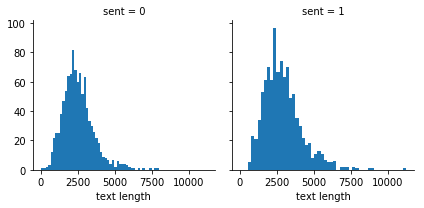

In [7]:
g = sns.FacetGrid(df, col='sent')
g.map(plt.hist, 'text length', bins =50)

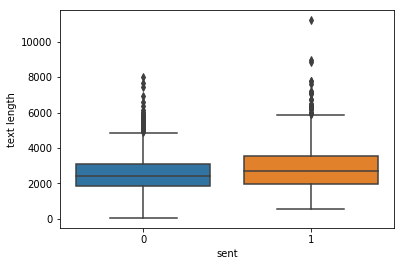

In [8]:
sns.boxplot(y = 'text length', x = 'sent', data = df)

Looks like the length of the reviews isn't going to help much here.

In [9]:
df.info()
df.sentiment.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 4 columns):
review         2000 non-null object
sentiment      2000 non-null object
sent           2000 non-null int64
text length    2000 non-null int64
dtypes: int64(2), object(2)
memory usage: 118.1+ KB


neg    1000
pos    1000
Name: sentiment, dtype: int64

In [10]:
X = df['review']
y = df['sentiment']

I need to vectorize the reviews to feed them to the algorithm I'll be using.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [12]:
X = cv.fit_transform(X)

Now I can split the data for training and testing.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

I'll first try a Naive Bayes algorithm for classifying the data. Once we see how that works, I'll try TextBlob's algorithm and compare which is better.

In [14]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [15]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
preds = nb.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

             precision    recall  f1-score   support

        neg       0.76      0.83      0.79       241
        pos       0.83      0.75      0.79       259

avg / total       0.79      0.79      0.79       500

[[201  40]
 [ 65 194]]


This performs alright. Let's put it in a pipleline and see if that helps at all.

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
pipe = Pipeline([('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [19]:

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [20]:
pipe.fit(X_train, y_train)
pipe_preds = pipe.predict(X_test)
print(classification_report(y_test, pipe_preds))
print(confusion_matrix(y_test, pipe_preds))

             precision    recall  f1-score   support

        neg       0.81      0.87      0.84       249
        pos       0.86      0.80      0.83       251

avg / total       0.84      0.83      0.83       500

[[217  32]
 [ 51 200]]


Looks like it helped increase accuracy a bit this time.

Let's try out the original algorithm with a simple, new sentence.

In [21]:
sample = cv.transform(['do not eat here'])
print(nb.predict(sample))

['neg']


That's easy enough. Now I'll try TextBlob's default algorithm, then a Naive Bayes algorithm with TextBlob.

In [22]:
from textblob import TextBlob

TextBlob's default algorithm gives a polarity score for reviews, so I'll use that to determine if the review is positive, negative or neutral.

In [23]:
sentiment_list = []
for s in df['review']:
    analysis = TextBlob(s)
    sent = analysis.sentiment
    if analysis.sentiment[0]>0:
        sentiment_list.append('pos')
    elif analysis.sentiment[0]<0:
        sentiment_list.append('neg')
    else:
        sentiment_list.append('neutral')

df['sentiment pred'] = sentiment_list
df.head()

,review,sentiment,sent,text length,sentiment pred
0,"films adapted comic books plenty success , whe...",pos,1,3096,pos
1,"every movie comes along suspect studio , every...",pos,1,2919,pos
2,got mail works alot better deserves . order ma...,pos,1,1551,pos
3,""" jaws "" rare film grabs attention shows singl...",pos,1,4383,pos
4,moviemaking lot like general manager nfl team ...,pos,1,2781,neg


In [24]:
errors = df[['sentiment', 'sentiment pred']][df['sentiment']!=df['sentiment pred']]
errors['sentiment'].count()
print('accuracy: ' + str(errors['sentiment'].count()/df['sentiment'].count()))

accuracy: 0.3815


The accuracy is really bad here. Worse than random. I'm going to move on to the Naive Bayes algorithm with TextBlob to seek better results. I'll split the data into training and testing sets for the algorithm.

In [25]:
train = df[['review', 'sentiment']]
train = train[:int(.75*len(train))]
train = train.values.tolist()
test = df[['review', 'sentiment']][int(.75*len(train)):]
test = test.values.tolist()

Now I'll train the classifier and test for accuracy.

In [26]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

In [27]:
cl.accuracy(test)

0.8022857142857143

This is pretty good, but again, nothing state of the art.

A cool feature of TextBlob is seeing which words hold the heaviest weights. Let's look at the top 10.

In [28]:
cl.show_informative_features(10)

Most Informative Features
    contains(incoherent) = True              neg : pos    =     15.3 : 1.0
     contains(illogical) = True              neg : pos    =     15.3 : 1.0
    contains(nomination) = True              pos : neg    =     13.5 : 1.0
   contains(overwrought) = True              neg : pos    =     11.3 : 1.0
      contains(fairness) = True              neg : pos    =     11.3 : 1.0
     contains(insulting) = True              neg : pos    =     10.8 : 1.0
      contains(flawless) = True              pos : neg    =     10.2 : 1.0
     contains(ludicrous) = True              neg : pos    =     10.0 : 1.0
       contains(wasting) = True              neg : pos    =     10.0 : 1.0
 contains(unimaginative) = True              neg : pos    =     10.0 : 1.0


Interesting stuff. Next, let's feed a review to the calssifier and see how it performs.

In [29]:
cl.classify(X_test.iloc[2])

'pos'

In [30]:
X_test.iloc[2]

"one observe star trek movie expect see serious science fiction . purpose star trek provide flashy , innocent fun . sometimes stories compelling . sometimes they're . , exception first film series ( provides little endless shots amazed faces ) , i've never bored enterprise's numerous missions . star trek : insurrection exception . film gotten negative reviews ( friend mine actually thinks worst series ) , i'm really sure . exciting , often hilarious movie engaged left ready next star trek film . say bit light , long episode film . others say special effects cheesy boring . simply enjoyed film . insurrection , second film feature strictly next generation cast , introduces us race people called ba'ku ; ba'ku old ( three hundred years old ) , actually appear younger age due strange radiation rings planet . course , peaceful people can't horde fountain youth ? leave archenemies , son'a , led ru'afo ( f . murray abraham ) , mess everything . son'a , horribly disfigured rely daily reconstruc

The review does indeed look positive. I'll try a new review now, and since it will be short, I'll use some of the heaviest weighted positive words.

In [31]:
new_review ="A flawless masterpiece depicting a story of pride and destiny"
new_review = ' '.join([word for word in new_review.split() if word not in cachedStopWords])
print(new_review)
cl.classify(new_review)

A flawless masterpiece depicting story pride destiny


'pos'

The classifier worked for this example.